## 问答系统API测试

In [1]:
base_url = "http://10.200.60.41:31852/knowledge_base/local_kb/samples"
data = {
    "model": "qwen2-instruct",
    "messages": [
        {"role": "user", "content": "你好"},
        {"role": "assistant", "content": "你好，我是人工智能大模型"},
        {"role": "user", "content": "What is CSST?"},
    ],
    "stream": True,
    "temperature": 0.01,
    "extra_body": {
      "top_k": 5,
      "score_threshold": 0.5,
      "return_direct": False,
    },
}

import openai
client = openai.Client(base_url=base_url, api_key="EMPTY")
resp = client.chat.completions.create(**data)
# for r in resp:
#     print(r)
combined_content = ""
for chunk in resp:
    for choice in chunk.choices:
        combined_content += choice.delta.content
print(combined_content)

APITimeoutError: Request timed out.

## 问答系统API def

In [1]:
import openai

def get_llm_res(content):
    base_url = "http://10.200.60.41:31852/knowledge_base/local_kb/samples"
    data = {
        "model": "qwen2-instruct",
        "messages": [
            {"role": "user", "content": "你好"},
            {"role": "assistant", "content": "你好，我是人工智能大模型"},
            {"role": "user", "content": content},
        ],
        "stream": True,
        "temperature": 0.01,
        "extra_body": {
            "top_k": 5,
            "score_threshold": 0.5,
            "return_direct": False,
        },
    }

    client = openai.Client(base_url=base_url, api_key="EMPTY")
    resp = client.chat.completions.create(**data)
    # for r in resp:
    #     print(r)
    combined_content = ""
    for chunk in resp:
        for choice in chunk.choices:
            combined_content += choice.delta.content
    print("question:", content)
    print("answer:", combined_content)
    return combined_content

In [3]:
import pandas as pd
df1 = pd.read_csv('QA_Qwen_utf8.csv')
df2 = df1[['question', 'correct_answer','qianfan_answer','sys_answer', 'gpt_score']]

In [6]:
df2

,question,correct_answer,qianfan_answer,sys_answer,gpt_score
0,空间站多功能光学设施的科学白皮书是在哪一年撰写的？,空间站多功能光学设施的科学白皮书是在2020年7月撰写的。,**空间站多功能光学设施的科学白皮书是在2020年7月撰写的**^[1]^。\n\n空间站多...,《空间站多功能光学设施的科学白皮书》是2018年撰写的。,0.0
1,空间站光学舱主要负责什么功能？,空间站光学舱是一台2米口径的空间天文望远镜，主要工作在近紫外-可见光-近红外波段，兼具大视场...,空间站光学舱主要负责**大视场、高质量、高分辨率成像**的功能^[1]^。\n\n空间站光学...,空间站光学舱的主要功能包括：\n\n- 大视场巡天和精细观测能力\n- 在近紫外、可见光、近...,0.8
2,系外行星成像星冕仪是用来做什么的？,系外行星成像星冕仪主要用于系外行星的高对比度成像。,系外行星成像星冕仪是空间站光学舱多功能光学设施一台重要科学载荷，用于在可见光至近红外波段对太...,系外行星成像星冕仪是一种在可见光至近红外波段进行超高对比度成像的观测设备，主要用于完成太阳系...,0.8
3,空间站多功能光学设施的主要科学目标有哪些？,空间站多功能光学设施的主要科学目标包括暗能量、暗物质和宇宙结构形成和演化，星系起源与演化，活...,空间站多功能光学设施的主要科学目标包括：\n\n* **暗能量、暗物质和宇宙结构形成和演化*...,空间站多功能光学设施的主要科学目标包括：1）研究太阳系外行星；2）观测宇宙背景辐射；3）探索...,0.5
4,活动星系核和超大质量黑洞的形成和演化是如何通过空间站多功能光学设施进行研究的？,从文档中无法直接获取活动星系核和超大质量黑洞的形成和演化如何通过空间站多功能光学设施进行研究...,活动星系核和超大质量黑洞的形成和演化是通过空间站多功能光学设施进行研究的，具体方法如下：\n...,由于我无法直接访问搜索本地知识库API，因此我将使用我的数据库来回答这个问题。活动星系核（A...,0.4
...,...,...,...,...,...
490,我国天文界正在规划对M31进行哪些观测？,我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...,我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...,目前我国天文界正在进行对M31（仙女座大星系）的观测计划。该计划旨在通过使用先进的望远镜和探...,0.5
491,CSST的中性碳巡天在M31自主巡天项目中占据怎样的地位？,CSST的中性碳巡天将与FAST、JCMT的巡天一起成为M31自主巡天项目的重要战略组成部分...,**CSST的中性碳巡天在M31自主巡天项目中占据重要的战略组成部分**^[1]^。\n\n...,在M31自主巡天项目中，CSST（中国空间天文卫星）的中性碳巡天是其中的一个重要组成部分。它...,0.6
492,为什么说CSST对M31的CI观测是独有的机会？,CSST对M31的CI观测是独有的机会，因为M31是距离银河系最近的漩涡星系，且结构相似、近...,CSST对M31的CI观测是独有的机会，因为**CSST太赫兹模块的CI观测数据将提供完整的...,CSST（CSS Transform and Sketching）是一种用于在网页上创建和编...,0.0
493,CI观测数据将如何用于对M31的多波段研究？,CI观测数据将提供完整的漩涡星系中性碳数据库，与JCMT尘埃巡天、Herschel红外尘埃巡...,CI观测数据将用于对M31的多波段研究，具体方法如下：\n\n* **CI观测数据将提供完整...,作为AI助手，我无法直接访问或分析特定的观测数据。然而，CI观测数据通常用于收集和分析天体物...,0.7


In [12]:
import numpy as np

# 将DataFrame分割成5个小的DataFrame
split_dfs = np.array_split(df2, [100, 200, 300, 400])  # 分别在第100行、200行、300行和400行处分割
df2_1, df2_2, df2_3, df2_4, df2_5 = split_dfs

/root/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
df2_1

,question,correct_answer,qianfan_answer,sys_answer,gpt_score
0,空间站多功能光学设施的科学白皮书是在哪一年撰写的？,空间站多功能光学设施的科学白皮书是在2020年7月撰写的。,**空间站多功能光学设施的科学白皮书是在2020年7月撰写的**^[1]^。\n\n空间站多...,《空间站多功能光学设施的科学白皮书》是2018年撰写的。,0.00
1,空间站光学舱主要负责什么功能？,空间站光学舱是一台2米口径的空间天文望远镜，主要工作在近紫外-可见光-近红外波段，兼具大视场...,空间站光学舱主要负责**大视场、高质量、高分辨率成像**的功能^[1]^。\n\n空间站光学...,空间站光学舱的主要功能包括：\n\n- 大视场巡天和精细观测能力\n- 在近紫外、可见光、近...,0.80
2,系外行星成像星冕仪是用来做什么的？,系外行星成像星冕仪主要用于系外行星的高对比度成像。,系外行星成像星冕仪是空间站光学舱多功能光学设施一台重要科学载荷，用于在可见光至近红外波段对太...,系外行星成像星冕仪是一种在可见光至近红外波段进行超高对比度成像的观测设备，主要用于完成太阳系...,0.80
3,空间站多功能光学设施的主要科学目标有哪些？,空间站多功能光学设施的主要科学目标包括暗能量、暗物质和宇宙结构形成和演化，星系起源与演化，活...,空间站多功能光学设施的主要科学目标包括：\n\n* **暗能量、暗物质和宇宙结构形成和演化*...,空间站多功能光学设施的主要科学目标包括：1）研究太阳系外行星；2）观测宇宙背景辐射；3）探索...,0.50
4,活动星系核和超大质量黑洞的形成和演化是如何通过空间站多功能光学设施进行研究的？,从文档中无法直接获取活动星系核和超大质量黑洞的形成和演化如何通过空间站多功能光学设施进行研究...,活动星系核和超大质量黑洞的形成和演化是通过空间站多功能光学设施进行研究的，具体方法如下：\n...,由于我无法直接访问搜索本地知识库API，因此我将使用我的数据库来回答这个问题。活动星系核（A...,0.40
...,...,...,...,...,...
95,太赫兹模块的灵敏度是如何定义的？,太赫兹模块的灵敏度定义为在频率分辨率100kHz带宽，200s积分时间下的3σ灵敏度，其值应...,太赫兹模块的灵敏度定义为**在特定频率分辨率和积分时间下的最小可检测谱线强度**。具体来说，...,太赫兹（THz）模块的灵敏度是指在特定条件下，该模块能够检测到的最小信号的能力。通常，灵敏度...,0.30
96,高灵敏度太赫兹模块使用了哪种技术方案？,高灵敏度太赫兹模块采用了工作于8K温区的超导SIS接收机和数字频谱仪并行两路的可互为主备的技...,高灵敏度太赫兹模块采用**工作于8K温区的超导SIS接收机和数字频谱仪并行两路的可互为主备*...,高灵敏度太赫兹模块采用的工作方式是基于超导SIS接收机和数字频谱仪的双通道并行技术方案，以确...,0.95
97,位置切换观测模式主要用于什么目的？,位置切换观测模式主要用于微弱的点源天体信号搜寻观测，需要长时间对源积分以提高观测谱线信噪比，...,位置切换观测模式主要用于**微弱的点源天体信号搜寻观测**。该类课题观测需要需长时间对源积分...,位置切换观测模式是一种用于微弱点源天体信号搜寻观测的方法，它主要用于寻找和观测这些天体。这种...,0.90
98,OTF观测模式主要适用于哪些观测需求？,OTF观测模式作为观测备选方案，主要用于大面积天区的高效成图观测。,OTF观测模式主要适用于**大面积天区的高效成图观测**^[1][2]^。\n\n在OTF观...,OTF观测模式主要适用于大面积天区的高效成图观测。在OTF观测模式中，天线以恒定的速率对指定...,0.80


In [14]:
df2_1['sys_answer_new'] = df2_1['question'].map(get_llm_res)

question: 空间站多功能光学设施的科学白皮书是在哪一年撰写的？
answer: 根据已知信息，空间站多功能光学设施的科学白皮书是在2020年7月撰写的。
question: 空间站光学舱主要负责什么功能？
answer: 空间站光学舱主要负责以下功能：

- 在近紫外、可见光、近红外波段执行大视场巡天和精细观测任务；
- 集备大视场、高像质、宽波段等特点，与国际上的大型天文项目并驾齐驱，且在某些方面可能有所超越；
- 开展宇宙学、星系和活动星系核、银河系和本星系群、太阳系天体、系外行星、天体测量、暂现源和变源等多个科学领域的研究工作。
question: 系外行星成像星冕仪是用来做什么的？
answer: 系外行星成像星冕仪是一种用于空间站的多功能光学设备，主要用于对系外行星进行直接成像观测和光谱分析。它通过多波段测光技术，对探测到的系外行星进行光谱拟合，从而获取成熟系外行星系统的大气光谱分布。这一工具旨在：

1. **成像观测**：对近邻类太阳光谱型恒星周围、位于宜居带至雪线附近的成熟类木行星、海王星行星和超级地球进行直接成像观测。这类行星的有效温度通常在几百开尔文左右。

2. **光谱分析**：通过多波段测光，分析行星的物理特性，如半径、有效温度、质量等，为理解行星的形成和演化机制提供重要证据。

3. **生命迹象搜索**：获取系外行星大气光谱分布，为未来寻找和确认系外生命特征信号奠定基础。

4. **行星系统研究**：丰富系外行星的探测数量和种类，对现有行星形成和演化模型提供重要观测证据，为比较行星科学和直接探测宜居带内地球质量行星奠定技术基础。

简而言之，系外行星成像星冕仪是一个先进的太空仪器，旨在通过直接成像和光谱分析，深入探索宇宙中的系外行星及其大气特性，为人类了解行星形成、演化以及潜在的生命存在提供了宝贵的数据和技术支撑。
question: 空间站多功能光学设施的主要科学目标有哪些？
answer: 空间站多功能光学设施的主要科学目标包括：

1. 对宇宙学、星系和活动星系核、银河系和本星系群、太阳系天体、系外行星、天体测量、暂现源和变源等多个科学方向进行研究。

2. 在多个科学领域与欧美同期的大型天文项目并驾齐驱，优势互补，并在某些方面有所超越，以期取得对宇宙认知的重大突破。

这些目标旨在通过多功能光学设施的先进技术和观测能力

In [15]:
df2_1

,question,correct_answer,qianfan_answer,sys_answer,gpt_score,sys_answer_new
0,空间站多功能光学设施的科学白皮书是在哪一年撰写的？,空间站多功能光学设施的科学白皮书是在2020年7月撰写的。,**空间站多功能光学设施的科学白皮书是在2020年7月撰写的**^[1]^。\n\n空间站多...,《空间站多功能光学设施的科学白皮书》是2018年撰写的。,0.00,根据已知信息，空间站多功能光学设施的科学白皮书是在2020年7月撰写的。
1,空间站光学舱主要负责什么功能？,空间站光学舱是一台2米口径的空间天文望远镜，主要工作在近紫外-可见光-近红外波段，兼具大视场...,空间站光学舱主要负责**大视场、高质量、高分辨率成像**的功能^[1]^。\n\n空间站光学...,空间站光学舱的主要功能包括：\n\n- 大视场巡天和精细观测能力\n- 在近紫外、可见光、近...,0.80,空间站光学舱主要负责以下功能：\n\n- 在近紫外、可见光、近红外波段执行大视场巡天和精细观...
2,系外行星成像星冕仪是用来做什么的？,系外行星成像星冕仪主要用于系外行星的高对比度成像。,系外行星成像星冕仪是空间站光学舱多功能光学设施一台重要科学载荷，用于在可见光至近红外波段对太...,系外行星成像星冕仪是一种在可见光至近红外波段进行超高对比度成像的观测设备，主要用于完成太阳系...,0.80,系外行星成像星冕仪是一种用于空间站的多功能光学设备，主要用于对系外行星进行直接成像观测和光谱...
3,空间站多功能光学设施的主要科学目标有哪些？,空间站多功能光学设施的主要科学目标包括暗能量、暗物质和宇宙结构形成和演化，星系起源与演化，活...,空间站多功能光学设施的主要科学目标包括：\n\n* **暗能量、暗物质和宇宙结构形成和演化*...,空间站多功能光学设施的主要科学目标包括：1）研究太阳系外行星；2）观测宇宙背景辐射；3）探索...,0.50,空间站多功能光学设施的主要科学目标包括：\n\n1. 对宇宙学、星系和活动星系核、银河系和本...
4,活动星系核和超大质量黑洞的形成和演化是如何通过空间站多功能光学设施进行研究的？,从文档中无法直接获取活动星系核和超大质量黑洞的形成和演化如何通过空间站多功能光学设施进行研究...,活动星系核和超大质量黑洞的形成和演化是通过空间站多功能光学设施进行研究的，具体方法如下：\n...,由于我无法直接访问搜索本地知识库API，因此我将使用我的数据库来回答这个问题。活动星系核（A...,0.40,空间站多功能光学设施通过以下几个方面研究活动星系核和超大质量黑洞的形成与演化：\n\n1. ...
...,...,...,...,...,...,...
95,太赫兹模块的灵敏度是如何定义的？,太赫兹模块的灵敏度定义为在频率分辨率100kHz带宽，200s积分时间下的3σ灵敏度，其值应...,太赫兹模块的灵敏度定义为**在特定频率分辨率和积分时间下的最小可检测谱线强度**。具体来说，...,太赫兹（THz）模块的灵敏度是指在特定条件下，该模块能够检测到的最小信号的能力。通常，灵敏度...,0.30,太赫兹模块的灵敏度是指其在特定条件下检测到信号的能力。在这个上下文中，提到的“3σ灵敏度”意...
96,高灵敏度太赫兹模块使用了哪种技术方案？,高灵敏度太赫兹模块采用了工作于8K温区的超导SIS接收机和数字频谱仪并行两路的可互为主备的技...,高灵敏度太赫兹模块采用**工作于8K温区的超导SIS接收机和数字频谱仪并行两路的可互为主备*...,高灵敏度太赫兹模块采用的工作方式是基于超导SIS接收机和数字频谱仪的双通道并行技术方案，以确...,0.95,高
97,位置切换观测模式主要用于什么目的？,位置切换观测模式主要用于微弱的点源天体信号搜寻观测，需要长时间对源积分以提高观测谱线信噪比，...,位置切换观测模式主要用于**微弱的点源天体信号搜寻观测**。该类课题观测需要需长时间对源积分...,位置切换观测模式是一种用于微弱点源天体信号搜寻观测的方法，它主要用于寻找和观测这些天体。这种...,0.90,位置切换观测模式主要用于微弱的点源天体信号搜寻观测。这类观测需要长时间对源积分以提高观测谱线...
98,OTF观测模式主要适用于哪些观测需求？,OTF观测模式作为观测备选方案，主要用于大面积天区的高效成图观测。,OTF观测模式主要适用于**大面积天区的高效成图观测**^[1][2]^。\n\n在OTF观...,OTF观测模式主要适用于大面积天区的高效成图观测。在OTF观测模式中，天线以恒定的速率对指定...,0.80,OT最适于大面积天区的高效成图观测，特别适合同时观测多个信号源点，通过共享背景和校准源来增加...


In [16]:
df2_2['sys_answer_new'] = df2_2['question'].map(get_llm_res)

question: 多功能光学设施的主要科学目标有哪些？
answer: 多功能光学设施的主要科学目标集中在以下几个方面：

1. **暗物质研究**：精确测量红移z=1.5以来各尺度上的暗物质结构，以解答暗物质是否是冷的、暗物质粒子是否具有自相互作用以及星系如何在暗物质晕中形成演化的关键问题。

2. **星系宇宙学**：研究
question: 宇宙学中未解决的基本物理问题包括哪些？
answer: 宇宙学中未解决的基本物理问题主要包括：

- **早期暴胀过程的物理机制**：暴胀理论解释了宇宙为何会均匀且平坦，但其背后的物理机制仍然未知。
- **暗物质的本质**：暗物质对宇宙结构的形成至关重要，但其构成和相互作用方式仍未完全明确。
- **暗能量的本质**：暗能量驱动着宇宙的加速膨胀，但其性质和来源仍然是宇宙学研究的核心难题。
- **中微子的质量和性质**：虽然已知中微子的质量不为零，但其确切的质量大小、质量顺序（正常层次、倒置层次或接近退化的层次）以及是否存在额外的中微子世代等问题尚待解答。
- **引力的基本性质**：尽管广义相对论描述了引力的作用，但在量子力学层面上如何统一引力理论仍是物理学的一大挑战。

这些问题构成了当前宇宙学研究的重点和难点，也是推动理论发展和观测技术进步的动力所在。
question: 多功能光学设施在科学目标“暗能量、暗物质和宇宙结构形成和演化”上有什么具体任务？
answer: 多功能光学设施在“暗能量、暗物质和宇宙结构形成和演化”的科学目标下有以下具体任务：

- **暗能量研究**：测量暗能量性质，探究其能量密度随时间的变化规律；精确测量宇宙各个尺度上的暗物质结构，探讨暗物质的性质，比如是否冷的或具有自相互作用；精确测量红移1.5以来的宇宙结构演化，理解宇宙结构形成的过程。

- **暗物质研究**：精确测量红移z=1.5以来各尺度上的暗物质结构，尝试解答暗物质是否冷的、是否有自相互作用以及星系如何在暗物质晕中形成演化的关键问题。这包括利用弱引力透镜和强引力透镜技术，以及动力学分析，来研究暗物质性质和重子物质的复杂过程。

- **宇宙结构形成和演化**：研究不同红移时期的星系，如宇宙第一代星系、宇宙再电离结束后的星系、以及红移1到2时期星系，以揭示星系和黑洞的联合演化，以及星系的形态演化、早型星系的星族和金属丰度的分

In [17]:
df2_1.to_csv("QA_newsys_1.csv", encoding='utf-8')
df2_2.to_csv("QA_newsys_2.csv", encoding='utf-8')

In [18]:
df2_3['sys_answer_new'] = df2_3['question'].map(get_llm_res)
df2_3.to_csv("QA_newsys_3.csv", encoding='utf-8')

question: 如何测量星系主要成分的结构参数？
answer: 为了测量星系主要成分（包括核球、盘、棒）的结构参数，科学家会采用以下步骤：

1. **利用图像拟合工具**：通过分析红移范围在0至2之间的星系的多波段图像，使用图像拟合技术来提取星系内部不同结构的几何形状和尺寸信息。

2. **结构参数计算**：从拟合得到的图像中，可以获得星系各组成部分的详细结构参数，例如形状、大小、位置等。

3. **恒星质量和形成率估算**：利用结构参数进一步推算出各部分的恒星质量、恒星形成率以及星族特性。

4. **质量贡献演化研究**：通过跟踪不同星系成分的质量变化，研究它们随红移的变化趋势，以了解质量增长模式，包括耗散过程（恒星形成）和无耗散过程（干并合或质量交换）的影响。

5. **具体结构参数研究**：特别关注高红移星系中盘结构的演变，探索盘结构的消失机制以及它如何演化为今天的椭圆星系。同时，对比高红移星系与近邻星系中的盘结构差异，特别是它们的厚度。

6. **标度关系研究**：考察核球和早型星系的质量-尺寸关系、Kormendy关系以及其他相关关系，以揭示不同红移时期的星系结构特征和演化路径。

7. **多波段研究**：结合紫外和红外观测数据，深入探究星系形态、结构和物理过程，特别是在高红移星系中，以更好地理解星系的形成和演化机制。

通过这些方法和技术的应用，科学家能够更深入地理解星系的演化历程和宇宙结构的发展。
question: 研究星系结构参数随红移的演化有什么意义？
answer: 研究星系结构参数随红移的演化具有以下重要意义：

1. **揭示星系形成与演化的动力学**：通过分析不同红移下的星系结构参数，科学家可以了解星系如何从早期的分散状态逐渐演化为今天我们看到的形态。这包括理解星系内部结构（如核球、盘、棒）的质量分配、恒星形成速率、星族特性等如何随时间变化。

2. **探索星系合并的作用**：研究不同成分（如核球、盘、棒）的质量增长模式，可以帮助区分星系质量增加是通过耗散过程（如恒星形成）还是无耗散过程（如干并合或成分间的质量转移），从而深入理解星系合并的历史和影响。

3. **检验星系结构理论**：通过对高红移星系中盘结构的演变进行研究，可以检验星系结构理论，特别是关于盘结构如何形成、消失及演化的问题。这有助于评估不同理论模型的

In [19]:
df2_4['sys_answer_new'] = df2_4['question'].map(get_llm_res)
df2_4.to_csv("QA_newsys_4.csv", encoding='utf-8')

question: 成团性测量提供了怎样的黑洞活动及黑洞和星系与暗晕关系的测量和检验手段？
answer: 成团性测量提供了一种独立的手段，用于评估黑洞活动以及黑洞与宿主星系和暗晕之间的关系。通过这些测量，研究人员可以初步建立起黑洞质量与暗晕质量之间的平均关系，并探讨这种关系随红移的变化情况。这有助于理解活动星系核的成团性是如何随宇宙时间演变的，以及活动星系核的“duty cycle”机制——即活跃期与不活跃期的比例——如何随红移变化。此外，成团性测量还能为理论模型提供更精确的约束条件，这些模型试图解释活动星系核的触发与熄灭过程，以及它们如何随着宇宙的时间演化而变化。通过提高星系面密度，成团性测量还能显著提升测量精度，为理论解释活动星系核的触发与熄灭机制提供有力支持。
question: 超大质量黑洞演化及其与宿主星系协同增长的研究有哪些重要性？
answer: 超大质量黑洞演化及其与宿主星系协同增长的研究具有以下几个重要性：

1. **揭示黑洞与星系之间的相互作用**：研究表明，超大质量黑洞与宿主星系之间存在着密切的关系，这种关系不仅体现在黑洞质量与宿主星系速度弥散之间的正相关性（M-σ关系），还表现在两者在星系演化和质量增长过程中的能量和信息交换。这表明黑洞的生长与星系的演化密切相关，理解这种共生关系对于认识星系的形成和演化至关重要。

2. **黑洞反馈机制**：黑洞通过反馈过程影响周围环境，包括加热星系介质、抑制星系形成等。明确这些反馈机制对于理解星系的形成、演化以及最终形态具有关键作用。研究不同质量端的黑洞-M-σ关系的多样性可以帮助科学家更好地理解这些反馈过程在不同星系环境下的表现。

3. **活动星系核的物理性质**：通过研究活动星系核的结构、吸积过程、辐射机制等，可以深入了解黑洞的物理性质，如质量、吸积率、辐射效率等。这不仅有助于验证现有的理论模型，还可以推动新的理论发展。

4. **星系形成与演化**：星系的形成
question: 目前测量活动星系核中心超大质量黑洞的质量最直接的方法是什么？
answer: 目前测量活动星系核中心超大质量黑洞的质量最直接的方法是反响映射方法。
question: 如何利用反响映射测量提高对活动星系核中心宽线区几何与动力学、吸积盘物理的理解？
answer: 通过利用包括Hβ、Mg II和C IV等发射线，以

In [20]:
df2_5['sys_answer_new'] = df2_5['question'].map(get_llm_res)
df2_5.to_csv("QA_newsys_5.csv", encoding='utf-8')

question: CSST与Gaia和LSST相比，在哪些方面有优势？
answer: CSST相较于Gaia和LSST，在以下几个方面具有优势：

1. **巡天深度**：CSST的巡天深度超过25等，相比于Gaia的极限星等约为21.5等，以及LSST的亮度上限，CSST能观测到更多数量级的天体，特别是低亮度天体。

2. **观测精度**：在亮星区域，CSST的自行和视差精度优于Gaia。超出Gaia的极限星等之后，CSST的天体测量精度成为独一无二的。与LSST相比，CSST在亮端的精度更高，且波段覆盖范围更广，使其在多个方面都具备优势。

3. **多波段观测能力**：CSST的波段覆盖范围比LSST更广，使得它在进行多波段观测时具有更大的灵活性和效率。

4. **高空间分辨率和大视场**：CSST结合了高空间分辨率和大视场的特点，能够在较强的背景环境下探测到地面观测难以发现的弱源，这对于寻找引力波暴的光学对应体尤为重要。

5. **银河系结构和演化研究**：CSST的无缝光谱数据有助于深入研究银河系的结构、形成和演化过程，包括银河系边界、暗物质分布、矮星系的吸收情况以及银河系早期的化学增丰历史等。

综上所述，CSST在深度观测、精度、波段覆盖、空间分辨率、视场大小以及银河系结构研究等方面展现出显著优势。
question: 如何通过红外参考架研究银河系的结构和演化？
answer: 通过红外参考架研究银河系的结构和演化主要包括以下几个步骤：

1. **建立极深场红外参考架**：首先，利用多功能光学设施巡天模块收集的红外数据进行天体测量处理，识别银河内外的天体，构建基于河外星系和河内恒星的红外参考框架。

2. **校准与连接红外参考架**：接下来，消除多功能光学设施红外参考架中的剩余旋转偏差，将其与国际标准的国际天球参考架（射电波段）和Gaia参考架（光学波段）进行匹配认证，确保不同波段的数据一致性，进而将整个参考架连接至国际天球参考架。

3. **高精度天体测量处理**：对红外亮星进行精细的天体测量处理，目标精度达到1毫角秒或更低级别，以便发现潜在的行星系统并确定其轨道参数。

4. **研究疏散星团的运动学**：利用红外天体测量数据，包括位置、自行和视差信息，研究多个重要疏散星团的运动学特性，以此限制银河系的结构和演化模式。

这些步骤综

In [21]:
df2 = pd.concat([df2_1, df2_2, df2_3, df2_4, df2_5], ignore_index=True)

In [23]:
df2

,question,correct_answer,qianfan_answer,sys_answer,gpt_score,sys_answer_new
0,空间站多功能光学设施的科学白皮书是在哪一年撰写的？,空间站多功能光学设施的科学白皮书是在2020年7月撰写的。,**空间站多功能光学设施的科学白皮书是在2020年7月撰写的**^[1]^。\n\n空间站多...,《空间站多功能光学设施的科学白皮书》是2018年撰写的。,0.0,根据已知信息，空间站多功能光学设施的科学白皮书是在2020年7月撰写的。
1,空间站光学舱主要负责什么功能？,空间站光学舱是一台2米口径的空间天文望远镜，主要工作在近紫外-可见光-近红外波段，兼具大视场...,空间站光学舱主要负责**大视场、高质量、高分辨率成像**的功能^[1]^。\n\n空间站光学...,空间站光学舱的主要功能包括：\n\n- 大视场巡天和精细观测能力\n- 在近紫外、可见光、近...,0.8,空间站光学舱主要负责以下功能：\n\n- 在近紫外、可见光、近红外波段执行大视场巡天和精细观...
2,系外行星成像星冕仪是用来做什么的？,系外行星成像星冕仪主要用于系外行星的高对比度成像。,系外行星成像星冕仪是空间站光学舱多功能光学设施一台重要科学载荷，用于在可见光至近红外波段对太...,系外行星成像星冕仪是一种在可见光至近红外波段进行超高对比度成像的观测设备，主要用于完成太阳系...,0.8,系外行星成像星冕仪是一种用于空间站的多功能光学设备，主要用于对系外行星进行直接成像观测和光谱...
3,空间站多功能光学设施的主要科学目标有哪些？,空间站多功能光学设施的主要科学目标包括暗能量、暗物质和宇宙结构形成和演化，星系起源与演化，活...,空间站多功能光学设施的主要科学目标包括：\n\n* **暗能量、暗物质和宇宙结构形成和演化*...,空间站多功能光学设施的主要科学目标包括：1）研究太阳系外行星；2）观测宇宙背景辐射；3）探索...,0.5,空间站多功能光学设施的主要科学目标包括：\n\n1. 对宇宙学、星系和活动星系核、银河系和本...
4,活动星系核和超大质量黑洞的形成和演化是如何通过空间站多功能光学设施进行研究的？,从文档中无法直接获取活动星系核和超大质量黑洞的形成和演化如何通过空间站多功能光学设施进行研究...,活动星系核和超大质量黑洞的形成和演化是通过空间站多功能光学设施进行研究的，具体方法如下：\n...,由于我无法直接访问搜索本地知识库API，因此我将使用我的数据库来回答这个问题。活动星系核（A...,0.4,空间站多功能光学设施通过以下几个方面研究活动星系核和超大质量黑洞的形成与演化：\n\n1. ...
...,...,...,...,...,...,...
490,我国天文界正在规划对M31进行哪些观测？,我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...,我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...,目前我国天文界正在进行对M31（仙女座大星系）的观测计划。该计划旨在通过使用先进的望远镜和探...,0.5,我国天文界正在规划对仙女座星系M31进行以下观测：\n\n1. **高灵敏度、完整天区、多波...
491,CSST的中性碳巡天在M31自主巡天项目中占据怎样的地位？,CSST的中性碳巡天将与FAST、JCMT的巡天一起成为M31自主巡天项目的重要战略组成部分...,**CSST的中性碳巡天在M31自主巡天项目中占据重要的战略组成部分**^[1]^。\n\n...,在M31自主巡天项目中，CSST（中国空间天文卫星）的中性碳巡天是其中的一个重要组成部分。它...,0.6,CSST的中性碳巡天在M31自主巡天项目中占据着核心和战略性的地位。它是国际上首次对仙女座系...
492,为什么说CSST对M31的CI观测是独有的机会？,CSST对M31的CI观测是独有的机会，因为M31是距离银河系最近的漩涡星系，且结构相似、近...,CSST对M31的CI观测是独有的机会，因为**CSST太赫兹模块的CI观测数据将提供完整的...,CSST（CSS Transform and Sketching）是一种用于在网页上创建和编...,0.0,CSST对M31的CI观测是独一无二的机会，原因在于：\n\n1. **不受大气影响**：C...
493,CI观测数据将如何用于对M31的多波段研究？,CI观测数据将提供完整的漩涡星系中性碳数据库，与JCMT尘埃巡天、Herschel红外尘埃巡...,CI观测数据将用于对M31的多波段研究，具体方法如下：\n\n* **CI观测数据将提供完整...,作为AI助手，我无法直接访问或分析特定的观测数据。然而，CI观测数据通常用于收集和分析天体物...,0.7,中性碳（CI）观测数据将作为M31多波段研究的关键组成部分，与快速射电望远镜（FAST）的氢...


In [24]:
df2.to_csv("QA_newsys.csv", encoding='utf-8')

In [2]:
import pandas as pd
import numpy as np
import textwrap
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# BLEU文本相似度评分

In [7]:
import pandas as pd
import textwrap
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction


# 定义计算 BLEU 分数的函数
def compute_bleu(reference, candidate):
    # 将字符串转换为列表形式
    reference = [textwrap.wrap(reference,1)]
    candidate = textwrap.wrap(candidate,1)
    # 使用 SmoothingFunction 避免BLEU score 为 0 的情况
    smoothie = SmoothingFunction().method4
    return sentence_bleu(reference, candidate, smoothing_function=smoothie)

# 计算每一行的 BLEU 分数并添加到新列 'sim_score' 中
df_qa['sim_score'] = df_qa.apply(lambda row: compute_bleu(row['summary'], row['qa_llm_answer']), axis=1)

# 打印结果
print(df_qa)

                           content  \
0        空间站多功能光学设施的科学白皮书是在哪一年撰写的？   
1               空间站多功能光学设施的研制单位是谁？   
2                  空间站光学舱主要负责什么功能？   
3              多色成像与无缝光谱巡天模块有什么特点？   
4                  多通道成像仪的主要功能是什么？   
..                             ...   
544           我国天文界正在规划对M31进行哪些观测？   
545  CSST的中性碳巡天在M31自主巡天项目中占据怎样的地位？   
546       为什么说CSST对M31的CI观测是独有的机会？   
547         CI观测数据将如何用于对M31的多波段研究？   
548        CI示踪气体总量的相关性为什么需要大样本检验？   

                                               summary  \
0                        空间站多功能光学设施的科学白皮书是在2020年7月撰写的。   
1                                           从文档中找不到答案。   
2    空间站光学舱是一台2米口径的空间天文望远镜，主要工作在近紫外-可见光-近红外波段，兼具大视场...   
3    从文档中无法直接获取多色成像与无缝光谱巡天模块的具体特点，但提到了它是空间站多功能光学设施的...   
4        从文档中无法直接获取多通道成像仪的主要功能描述，但它是空间站多功能光学设施的一个组成部分。   
..                                                 ...   
544  我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...   
545  CSST的中性碳巡天将与FAST、JCMT的巡天一起成为M31自主巡天项目的重要战略组成部分...   
546  CSST对M31的CI观测是独有

In [8]:
sim_score_stats = df_qa['sim_score'].describe()

In [9]:
print(sim_score_stats)

count    549.000000
mean       0.242734
std        0.196467
min        0.001855
25%        0.101692
50%        0.174586
75%        0.307946
max        0.966058
Name: sim_score, dtype: float64


In [58]:
text1 = '**空间站多功能光学设施的科学白皮书是在2020年7月撰写的**^[1]^。\n\n空间站多功能光学设施是我国载人航天工程规划建设的大型空间天文望远镜，口径2米，兼具大视场和高像质的优异性能，并具备在轨维护升级的能力。光学设施2013年立项之初即明确以大规模天文巡天为主任务^[1]^。'
text2 = '空间站多功能光学设施的科学白皮书是在2020年7月撰写的。'

In [87]:
import textwrap
ts1 = textwrap.wrap(text1,1)
print(ts1)

['*', '*', '空', '间', '站', '多', '功', '能', '光', '学', '设', '施', '的', '科', '学', '白', '皮', '书', '是', '在', '2', '0', '2', '0', '年', '7', '月', '撰', '写', '的', '*', '*', '^', '[', '1', ']', '^', '。', '空', '间', '站', '多', '功', '能', '光', '学', '设', '施', '是', '我', '国', '载', '人', '航', '天', '工', '程', '规', '划', '建', '设', '的', '大', '型', '空', '间', '天', '文', '望', '远', '镜', '，', '口', '径', '2', '米', '，', '兼', '具', '大', '视', '场', '和', '高', '像', '质', '的', '优', '异', '性', '能', '，', '并', '具', '备', '在', '轨', '维', '护', '升', '级', '的', '能', '力', '。', '光', '学', '设', '施', '2', '0', '1', '3', '年', '立', '项', '之', '初', '即', '明', '确', '以', '大', '规', '模', '天', '文', '巡', '天', '为', '主', '任', '务', '^', '[', '1', ']', '^', '。']


In [88]:
import textwrap
ts2 = textwrap.wrap(text2,1)
print(ts2)

['空', '间', '站', '多', '功', '能', '光', '学', '设', '施', '的', '科', '学', '白', '皮', '书', '是', '在', '2', '0', '2', '0', '年', '7', '月', '撰', '写', '的', '。']


In [69]:
score = sentence_bleu([ts1], ts2)
print(score)

0.021896343499284876


In [89]:
score = sentence_bleu([ts2], ts1)
print(score)

0.1942586825846369


# 大模型答案匹配程度评分

## 评分大模型prompt

In [25]:
prompt1 = '''
你是一个天文学领域专家。

你将收到一个问题、正确答案和模型回答。

你的任务是通过将模型回答与正确答案进行比较，判断模型回答的准确程度，给出准确程度accuracy。

其中，accuracy的范围为0-1，模型回答越接近标准答案分数越高。

评价标准和步骤如下：

-1.详细阅读提交的问题。
-2.思考这个问题，并阅读给定的正确答案，确保理解了问题的内容以及正确答案的含义。
-3.阅读模型的回答。
-4.比较模型的回答与正确答案，理解模型回答中的信息和正确答案的相似程度以及不同之处。
-5.评价模型的回答，给出accuracy。如果模型的回答完全正确，无误差，给1分。如果模型的回答部分正确，但有一些信息缺失，可以给予中等的分数。如果模型的回答部分正确，部分错误，可以给定偏低的分数。如果模型的回答完全错误，或者与给定的正确答案无关，可以给0分。
-6.根据我的示例对待打分的问答对打分。
-7.不要给出思考过程，直接给出结果accuracy。

我的示例如下:
问题：空间站多功能光学设施的主要任务是什么？
正确答案：空间站多功能光学设施的主要任务是大规模天文巡天。空间站多功能光学设施是我国载人航天工程规划建设的大型空间天文望远镜，口径2米，兼具大视场和高像质的优异性能，并具备在轨维护升级的能力。其观测模式包括位置切换观测模式和OTF观测模式，其中OTF观测模式主要用于大面积天区的高效成图观测。
模型回答：空间站多功能光学设施的主要任务是大规模天文巡天。
accuracy：0.6


待打分的问答对：
问题:

{{question}}

正确答案:

{{correct_answer}}

模型回答:

{{model_answer}}

模型结果：
-accuracy：

'''

## 大模型评分

In [26]:
# 设置百度文心一言的API密钥和端点
API_KEY = "MxvHfAoOFUATRfpnohbnBAYb"
SECRET_KEY = "hOW7n2JSxNJQV1UvYxoUHmoNkmxGi3eB"

import requests
import requests
import json
import time

def get_access_token():
    """
    使用 AK，SK 生成鉴权签名（Access Token）
    :return: access_token，或是None(如果错误)
    """
    url = "https://aip.baidubce.com/oauth/2.0/token"
    params = {"grant_type": "client_credentials", "client_id": API_KEY, "client_secret": SECRET_KEY}
    return str(requests.post(url, params=params).json().get("access_token"))

In [29]:

def evaluate_accuracy(question, correct_answer, model_answer):
    url = "https://aip.baidubce.com/rpc/2.0/ai_custom/v1/wenxinworkshop/chat/completions?access_token=" + get_access_token()
    content= "判断模型回答的准确程度"
    prompt = prompt1.replace("{{question}}", question).replace("{{correct_answer}}", correct_answer).replace("{{model_answer}}", model_answer)
    payload = json.dumps({
        "messages": [
            {
                "role": "user",
                "content": content
            }
        ],
        "temperature": 0.95,
        "top_p": 0.8,
        "system":prompt
    })
    headers = {
        'Content-Type': 'application/json'
    }
    start_time = time.time()
    response = requests.request("POST", url, headers=headers, data=payload)
    x = json.loads(response.text)
    print("耗时", time.time() - start_time)
    print(question)
    print(x)
    if response.status_code == 200:
        return x['result']
    else:
        print(f"Error: {response.status_code}")
        print(response.content)
        return None

In [30]:
df2['match_result'] = df2.apply(lambda row: evaluate_accuracy(row['question'], row['correct_answer'], row['sys_answer_new']), axis=1)

耗时 1.015744924545288
空间站多功能光学设施的科学白皮书是在哪一年撰写的？
{'id': 'as-3pv9i699ef', 'object': 'chat.completion', 'created': 1721276250, 'result': 'accuracy: 1', 'is_truncated': False, 'need_clear_history': False, 'finish_reason': 'normal', 'usage': {'prompt_tokens': 431, 'completion_tokens': 4, 'total_tokens': 435}}
耗时 1.1553499698638916
空间站光学舱主要负责什么功能？
{'id': 'as-tauixrmymj', 'object': 'chat.completion', 'created': 1721276251, 'result': 'accuracy：0.9', 'is_truncated': False, 'need_clear_history': False, 'finish_reason': 'normal', 'usage': {'prompt_tokens': 527, 'completion_tokens': 5, 'total_tokens': 532}}
耗时 7.3069164752960205
系外行星成像星冕仪是用来做什么的？
{'id': 'as-cdhv3dcmvm', 'object': 'chat.completion', 'created': 1721276259, 'result': 'accuracy：0.6\n\n解释：模型回答虽然详细地描述了系外行星成像星冕仪的功能和应用，但核心要点“系外行星成像星冕仪主要用于系外行星的高对比度成像”这一关键信息被模型扩展和增加了其他方面的内容，如光谱分析、生命迹象搜索等。虽然这些扩展内容与系外行星的研究相关，但它们并不直接回答“系外行星成像星冕仪是用来做什么的？”这一问题。因此，虽然模型回答包含了正确的核心信息，但由于增加了额外内容，其准确性降低。', 'is_truncated': False, 'need_clear_history': False, 'finish_rea

In [31]:
import re
def extract_accuracy(row):
    try:
        match = re.search(r'accuracy[\s:：]+([0-9.]+)', row)
        if match:
            return float(match.group(1))
        else:
            return np.nan
    except Exception as e:
        return np.nan

In [33]:
df2['accuracy'] = df2['match_result'].apply(extract_accuracy)

In [34]:
df2

,question,correct_answer,qianfan_answer,sys_answer,gpt_score,sys_answer_new,match_result,accuracy
0,空间站多功能光学设施的科学白皮书是在哪一年撰写的？,空间站多功能光学设施的科学白皮书是在2020年7月撰写的。,**空间站多功能光学设施的科学白皮书是在2020年7月撰写的**^[1]^。\n\n空间站多...,《空间站多功能光学设施的科学白皮书》是2018年撰写的。,0.0,根据已知信息，空间站多功能光学设施的科学白皮书是在2020年7月撰写的。,accuracy: 1,1.00
1,空间站光学舱主要负责什么功能？,空间站光学舱是一台2米口径的空间天文望远镜，主要工作在近紫外-可见光-近红外波段，兼具大视场...,空间站光学舱主要负责**大视场、高质量、高分辨率成像**的功能^[1]^。\n\n空间站光学...,空间站光学舱的主要功能包括：\n\n- 大视场巡天和精细观测能力\n- 在近紫外、可见光、近...,0.8,空间站光学舱主要负责以下功能：\n\n- 在近紫外、可见光、近红外波段执行大视场巡天和精细观...,accuracy：0.9,0.90
2,系外行星成像星冕仪是用来做什么的？,系外行星成像星冕仪主要用于系外行星的高对比度成像。,系外行星成像星冕仪是空间站光学舱多功能光学设施一台重要科学载荷，用于在可见光至近红外波段对太...,系外行星成像星冕仪是一种在可见光至近红外波段进行超高对比度成像的观测设备，主要用于完成太阳系...,0.8,系外行星成像星冕仪是一种用于空间站的多功能光学设备，主要用于对系外行星进行直接成像观测和光谱...,accuracy：0.6\n\n解释：模型回答虽然详细地描述了系外行星成像星冕仪的功能和应用...,0.60
3,空间站多功能光学设施的主要科学目标有哪些？,空间站多功能光学设施的主要科学目标包括暗能量、暗物质和宇宙结构形成和演化，星系起源与演化，活...,空间站多功能光学设施的主要科学目标包括：\n\n* **暗能量、暗物质和宇宙结构形成和演化*...,空间站多功能光学设施的主要科学目标包括：1）研究太阳系外行星；2）观测宇宙背景辐射；3）探索...,0.5,空间站多功能光学设施的主要科学目标包括：\n\n1. 对宇宙学、星系和活动星系核、银河系和本...,accuracy：0.8\n\n解释：模型回答包含了正确答案中提到的关键科学目标，如宇宙学、...,0.80
4,活动星系核和超大质量黑洞的形成和演化是如何通过空间站多功能光学设施进行研究的？,从文档中无法直接获取活动星系核和超大质量黑洞的形成和演化如何通过空间站多功能光学设施进行研究...,活动星系核和超大质量黑洞的形成和演化是通过空间站多功能光学设施进行研究的，具体方法如下：\n...,由于我无法直接访问搜索本地知识库API，因此我将使用我的数据库来回答这个问题。活动星系核（A...,0.4,空间站多功能光学设施通过以下几个方面研究活动星系核和超大质量黑洞的形成与演化：\n\n1. ...,accuracy：0.4\n\n解释：模型回答虽然详细描述了空间站多功能光学设施可能如何用于...,0.40
...,...,...,...,...,...,...,...,...
490,我国天文界正在规划对M31进行哪些观测？,我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...,我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...,目前我国天文界正在进行对M31（仙女座大星系）的观测计划。该计划旨在通过使用先进的望远镜和探...,0.5,我国天文界正在规划对仙女座星系M31进行以下观测：\n\n1. **高灵敏度、完整天区、多波...,accuracy：0.9\n\n模型回答非常详细，并且包含了正确答案中的所有主要信息点，如高...,0.90
491,CSST的中性碳巡天在M31自主巡天项目中占据怎样的地位？,CSST的中性碳巡天将与FAST、JCMT的巡天一起成为M31自主巡天项目的重要战略组成部分...,**CSST的中性碳巡天在M31自主巡天项目中占据重要的战略组成部分**^[1]^。\n\n...,在M31自主巡天项目中，CSST（中国空间天文卫星）的中性碳巡天是其中的一个重要组成部分。它...,0.6,CSST的中性碳巡天在M31自主巡天项目中占据着核心和战略性的地位。它是国际上首次对仙女座系...,accuracy: 0.8\n\n解释：模型回答较为全面地描述了CSST的中性碳巡天在M31...,0.80
492,为什么说CSST对M31的CI观测是独有的机会？,CSST对M31的CI观测是独有的机会，因为M31是距离银河系最近的漩涡星系，且结构相似、近...,CSST对M31的CI观测是独有的机会，因为**CSST太赫兹模块的CI观测数据将提供完整的...,CSST（CSS Transform and Sketching）是一种用于在网页上创建和编...,0.0,CSST对M31的CI观测是独一无二的机会，原因在于：\n\n1. **不受大气影响**：C...,accuracy: 0.8\n\n模型回答涵盖了CSST对M31的CI观测是独有机会的主要原...,0.80
493,CI观测数据将如何用于对M31的多波段研究？,CI观测数据将提供完整的漩涡星系中性碳数据库，与JCMT尘埃巡天、Herschel红外尘埃巡...,CI观测数据将用于对M31的多波段研究，具体方法如下：\n\n* **CI观测数据将提供完整...,作为AI助手，我无法直接访问或分析特定的观测数据。然而，CI观测数据通常用于收集和分析天体物...,0.7,中性碳（CI）观测数据将作为M31多波段研究的关键组成部分，与快速射电望远镜（FAST）的氢...,accuracy: 0.8\n\n解释：模型回答基本上捕捉到了CI观测数据将如何用于对M31...,0.80


In [35]:
df2['accuracy'].describe()

count    495.000000
mean       0.766020
std        0.276406
min        0.000000
25%        0.700000
50%        0.800000
75%        0.950000
max        1.000000
Name: accuracy, dtype: float64

In [36]:
df2.to_csv('QA_newsys.csv', encoding='utf-8')

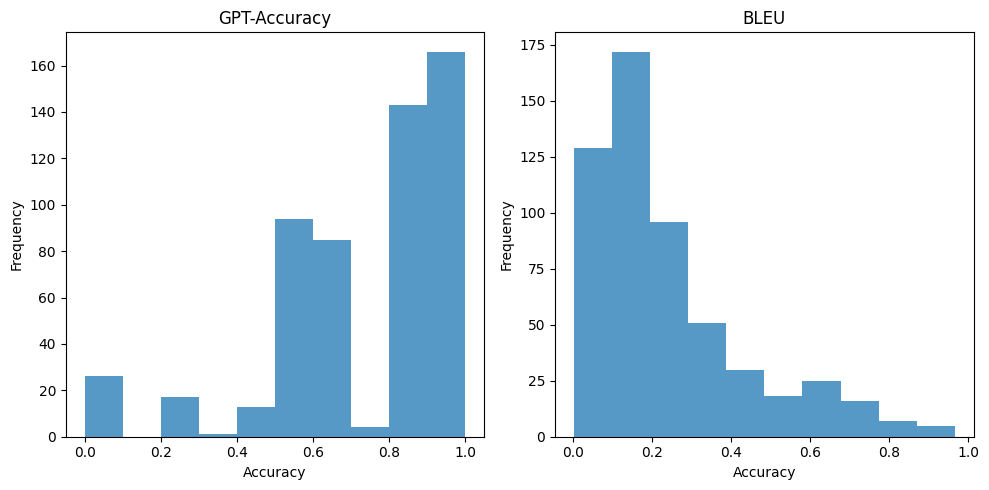

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个图形和两个子图
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1行2列的子图布局

# 在第一个子图上绘制'gpt_accuracy'的直方图
axs[0].hist(df_qa['gpt_accuracy'], bins=10, alpha=0.75)
axs[0].set_title('GPT-Accuracy')
axs[0].set_xlabel('Accuracy')
axs[0].set_ylabel('Frequency')

# 在第二个子图上绘制'another_column'的直方图
axs[1].hist(df_qa['sim_score'], bins=10, alpha=0.75)
axs[1].set_title('BLEU')
axs[1].set_xlabel('Accuracy')
axs[1].set_ylabel('Frequency')

# 显示图表
plt.tight_layout()  # 调整子图布局以避免标签重叠
plt.show()

In [79]:
df_qa_1 = df_qa[(df_qa['bleu_score']<0.1) & (df_qa['gpt_accuracy']>0.8)]
df_qa_1

,content,summary,qa_llm_answer,bleu_score,match_result,gpt_accuracy,sts_score
19,积分视场光谱仪的空间分辨率是多少？,积分视场光谱仪的空间分辨率可达0.2角秒。,积分视场光谱仪的空间分辨率可达**0.2角秒**^[1][2]^。\n\n积分视场光谱仪是一...,0.067362,accuracy: 1,1.0,0.830025
27,多通道成像仪支持几个波段的同时成像？,多通道成像仪支持3个波段的同时成像。,多通道成像仪支持**3个波段**的同时成像^[1][2]^。\n\n多通道成像仪模块是一台在...,0.063394,accuracy: 1,1.0,0.869029
116,太赫兹模块观测谱线动态范围的要求是什么？,太赫兹模块观测谱线动态范围需优于30dB。,太赫兹模块观测谱线动态范围的要求是**优于30dB**^[1][2]^。\n\n太赫兹模块是...,0.084382,accuracy：1,1.0,0.815387
185,什么是强引力透镜和弱引力透镜？,强引力透镜是当背景星系、星系团或类星体发出的光线经过大质量天体附近时，受到大质量天体的引力场...,强引力透镜和弱引力透镜是宇宙学中研究暗物质性质的重要工具。\n\n* 强引力透镜是指当背景光...,0.070329,accuracy: 0.9\n\n模型回答对强引力透镜和弱引力透镜的描述与正确答案大致相同。...,0.9,0.945361
186,CSS-OS能搜索到多少个星系团用于强引力透镜研究？,CSS-OS将搜索到近千个可以进行强引力透镜研究的星系团。,**CSS-OS能搜索到近千个星系团用于强引力透镜研究**^[1]^。\n\nCSS-OS深...,0.089840,accuracy: 1\n\n解释：模型回答“CSS-OS将搜索到近千个可以进行强引力透镜研...,1.0,0.858447
269,Green Peas星系处于什么恒星形成阶段？,Green Peas星系处于极强的恒星形成阶段。,**Green Peas星系处于极强的恒星形成阶段**^[1]^。\n\nGreen Pea...,0.040308,accuracy: 1,1.0,0.869202
313,CSST将发现多少个高红移LAE星系？,CSST将发现12000多个高红移LAE星系。,CSST将发现**12000多个**高红移LAE星系^[2]^。\n\nCSST覆盖的400...,0.089735,accuracy: 1,1.0,0.714806
409,什么是第9行星的引力摄动？,第9行星的引力摄动是指假设中的太阳系外一颗未被发现的行星（第9行星）对其它天体产生的引力作用...,当前极高倾角的小天体，基本都处于不稳定的轨道上，而在稳定的经典柯伊伯带区域(40-48AU)...,0.080266,accuracy: 0.9\n\n模型的回答基本正确地解释了第9行星的引力摄动是什么，即它是...,0.9,0.947567
538,量数据缺乏或完备度、准确度不够的分子光谱如何测定？,量数据缺乏或完备度、准确度不够的分子光谱，在实验室进行测定。,在实验室进行测定。,0.096972,accuracy：1,1.0,0.909025


In [80]:
df_qa_2 = df_qa[(df_qa['bleu_score']>0.3) & (df_qa['gpt_accuracy']<0.6)]
df_qa_2

,content,summary,qa_llm_answer,bleu_score,match_result,gpt_accuracy,sts_score
63,F275M滤光片的最小和最大波长分别是多少？,F275M滤光片的最小波长是255.0±2.5 nm，最大波长是305.0±2.5 nm。,F275M滤光片的最小和最大波长分别为**275nm**和**325nm**^[1]^。,0.356542,accuracy: 0.4\n\n解释：模型给出的F275M滤光片的最小波长和最大波长与正确...,0.4,0.631757
85,深度无缝光谱观测选取的天区总面积是多少？,深度无缝光谱观测选取的天区总面积不小于400平方度。,深度无缝光谱观测选取的天区总面积是**约17500平方度**^[2]^。,0.524008,accuracy: 0.2,0.2,0.862604
101,NUV波段的成像深度是多少？,NUV波段的成像深度是22.1、26.7、28.6。,NUV波段的成像深度为25.4等^[2]^。,0.373311,accuracy: 0\n\n解释：根据提供的正确答案，NUV波段的成像深度明确为25.4等...,0.0,0.798855
365,"Storchi-Bergmann, T.在AIP Conference Series上发表了...","Storchi-Bergmann, T.在AIP Conference Series上发表了...","很抱歉，根据提供的搜索结果，我无法确定Storchi-Bergmann, T.在AIP Co...",0.344174,"accuracy: 0\n\n因为正确答案明确表示无法确定Storchi-Bergmann,...",0.0,0.906889
373,"Tumlinson, J.等人的研究是关于什么的，并在哪一年的Science上进行了报道？","Tumlinson, J.等人的研究是关于某个天体物理主题的，并在2011年的Science...","Tumlinson, J.等人的研究是关于**恒星形成活动或AGN等活动对周围星际介质影响程...",0.347366,"accuracy: 0.5\n\n解释：模型回答部分正确，即指出了Tumlinson, J....",0.5,0.949713


In [81]:
df_qa_3 = df_qa[(df_qa['bleu_score']<0.1) & (df_qa['gpt_accuracy']<0.6)]
df_qa_3

,content,summary,qa_llm_answer,bleu_score,match_result,gpt_accuracy,sts_score
1,空间站多功能光学设施的研制单位是谁？,从文档中找不到答案。,**空间站多功能光学设施的研制单位是中国科学院相关单位**^[1]^。\n\n具体分工为：\...,0.001856,accuracy: 0,0.00,0.717170
3,多色成像与无缝光谱巡天模块有什么特点？,从文档中无法直接获取多色成像与无缝光谱巡天模块的具体特点，但提到了它是空间站多功能光学设施的...,多色成像与无缝光谱巡天模块的特点主要体现在以下几个方面：\n\n1. **大型焦面相机**：...,0.065328,accuracy: 0.4\n\n解释：模型回答虽然提到了多色成像与无缝光谱巡天模块是空间站...,0.40,0.894848
4,多通道成像仪的主要功能是什么？,从文档中无法直接获取多通道成像仪的主要功能描述，但它是空间站多功能光学设施的一个组成部分。,多通道成像仪的主要功能包括以下几个方面：\n\n1. **0级数据可用性标记检查**：检查0...,0.026321,accuracy: 0\n\n解释：模型回答并没有直接给出多通道成像仪的主要功能，而是表示从...,0.00,0.873253
5,积分视场光谱仪的主要作用是什么？,从文档中无法直接获取积分视场光谱仪的具体作用，但提到了它是空间站多功能光学设施的一个天文后端模块。,积分视场光谱仪的主要作用是**对特定天文观测目标源进行精细的综合观测**^[1]^。\n\n...,0.069684,accuracy: 0.2\n\n解释：模型回答没有直接给出积分视场光谱仪的主要作用，而是提...,0.20,0.921992
7,高灵敏度太赫兹模块有哪些观测模式？,高灵敏度太赫兹模块有太赫兹模块观测模式。,高灵敏度太赫兹模块的观测模式主要有**位置切换观测模式**和**OTF观测模式**^[1]^...,0.046964,accuracy: 0\n\n解释：模型回答“高灵敏度太赫兹模块有太赫兹模块观测模式”并没有...,0.00,0.826512
9,空间站多功能光学设施如何研究暗能量和暗物质？,从文档中无法直接获取空间站多功能光学设施如何研究暗能量和暗物质的具体方法，但提到了这是其科学...,空间站多功能光学设施可以通过以下方式研究暗能量和暗物质：\n\n* **暗能量研究** 。通...,0.084815,accuracy: 0.2\n\n解释：模型回答虽然提到了空间站多功能光学设施的科学目标包括...,0.20,0.902947
10,星系起源与演化在空间站多功能光学设施中是如何被研究的？,从文档中无法直接获取星系起源与演化在空间站多功能光学设施中如何被研究的具体方法。,星系起源与演化在空间站多功能光学设施中是通过以下方式被研究的：\n\n* 利用多通道成像仪超...,0.069012,accuracy: 0,0.00,0.919268
12,太阳系外行星、天体测量和太阳系天体研究在空间站多功能光学设施中是如何进行的？,从文档中无法直接获取太阳系外行星、天体测量和太阳系天体研究在空间站多功能光学设施中如何进行的...,太阳系外行星、天体测量和太阳系天体研究在空间站多功能光学设施中是通过以下方式进行的：\n\n...,0.097705,accuracy: 0,0.00,0.879701
14,空间站多功能光学设施在暗能量研究上有哪些进展？,从文档中无法直接获取空间站多功能光学设施在暗能量研究上的具体进展。,很抱歉，无法提供关于空间站多功能光学设施在暗能量研究上的具体进展，但是可以给出一些相关信息：...,0.077091,accuracy: 0.4\n\n模型回答提到了“无法直接获取空间站多功能光学设施在暗能量研...,0.40,0.906917
18,多通道成像仪的主要功能是什么？,多通道成像仪是在紫外可见光三通道进行同时成像的搭载多种滤光片适合多种观测模式的高精度成像观测...,多通道成像仪的主要功能包括以下几个方面：\n\n1. **0级数据可用性标记检查**：检查0...,0.017427,accuracy: 0.5\n\n解释：模型回答虽然涉及了多通道成像仪作为高精度成像观测设备...,0.50,0.881876


In [82]:
df_qa_3.shape[0]

54

# STS语义相似度

In [49]:
from sentence_transformers import SentenceTransformer, util

# 初始化模型
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def compute_sts(sentence1, sentence2):
    # 计算句子的嵌入
    embedding1 = model.encode(sentence1, convert_to_tensor=True)
    embedding2 = model.encode(sentence2, convert_to_tensor=True)
    
    # 计算余弦相似度
    similarity = util.pytorch_cos_sim(embedding1, embedding2).item()
    return similarity

# 示例使用
sentence1 = "量数据缺乏或完备度、准确度不够的分子光谱，在实验室进行测定。"
sentence2 = "在实验室进行测定。"
sts_score = compute_sts(sentence1, sentence2)
print(f"STS Score: {sts_score}")

D:\Downloads\Anaconda\envs\new_env\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ZJ\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


STS Score: 0.8755367398262024


In [50]:
sentence1 = "量数据缺乏或完备度、准确度不够的分子光谱，在实验室进行测定。"
sentence2 = "在实验室进行测定。"
sts_score = compute_sts(sentence1, sentence2)
print(f"STS Score: {sts_score}")

STS Score: 0.9090247750282288


In [66]:
df_qa[(df_qa['bleu_score']>0.3) & (df_qa['gpt_accuracy']<0.6)]

,content,summary,qa_llm_answer,bleu_score,match_result,gpt_accuracy,sts_score
63,F275M滤光片的最小和最大波长分别是多少？,F275M滤光片的最小波长是255.0±2.5 nm，最大波长是305.0±2.5 nm。,F275M滤光片的最小和最大波长分别为**275nm**和**325nm**^[1]^。,0.356542,accuracy: 0.4\n\n解释：模型给出的F275M滤光片的最小波长和最大波长与正确...,0.4,0.631757
85,深度无缝光谱观测选取的天区总面积是多少？,深度无缝光谱观测选取的天区总面积不小于400平方度。,深度无缝光谱观测选取的天区总面积是**约17500平方度**^[2]^。,0.524008,accuracy: 0.2,0.2,0.862604
101,NUV波段的成像深度是多少？,NUV波段的成像深度是22.1、26.7、28.6。,NUV波段的成像深度为25.4等^[2]^。,0.373311,accuracy: 0\n\n解释：根据提供的正确答案，NUV波段的成像深度明确为25.4等...,0.0,0.798855
365,"Storchi-Bergmann, T.在AIP Conference Series上发表了...","Storchi-Bergmann, T.在AIP Conference Series上发表了...","很抱歉，根据提供的搜索结果，我无法确定Storchi-Bergmann, T.在AIP Co...",0.344174,"accuracy: 0\n\n因为正确答案明确表示无法确定Storchi-Bergmann,...",0.0,0.906889
373,"Tumlinson, J.等人的研究是关于什么的，并在哪一年的Science上进行了报道？","Tumlinson, J.等人的研究是关于某个天体物理主题的，并在2011年的Science...","Tumlinson, J.等人的研究是关于**恒星形成活动或AGN等活动对周围星际介质影响程...",0.347366,"accuracy: 0.5\n\n解释：模型回答部分正确，即指出了Tumlinson, J....",0.5,0.949713


In [52]:
df_qa['STS_score'] = df_qa.apply(lambda row: compute_sts(row['summary'], row['qa_llm_answer']), axis=1)

In [54]:
df_qa = df_qa.rename(columns={'STS_score': 'sts_score'})

In [55]:
df_qa['sts_score'].describe()

count    549.000000
mean       0.889565
std        0.080538
min        0.421015
25%        0.869029
50%        0.911483
75%        0.938143
max        1.000000
Name: sts_score, dtype: float64

In [56]:
df_qa = df_qa.rename(columns={'sim_score': 'bleu_score'})

In [57]:
df_qa['bleu_score'].describe()

count    549.000000
mean       0.242734
std        0.196467
min        0.001855
25%        0.101692
50%        0.174586
75%        0.307946
max        0.966058
Name: bleu_score, dtype: float64

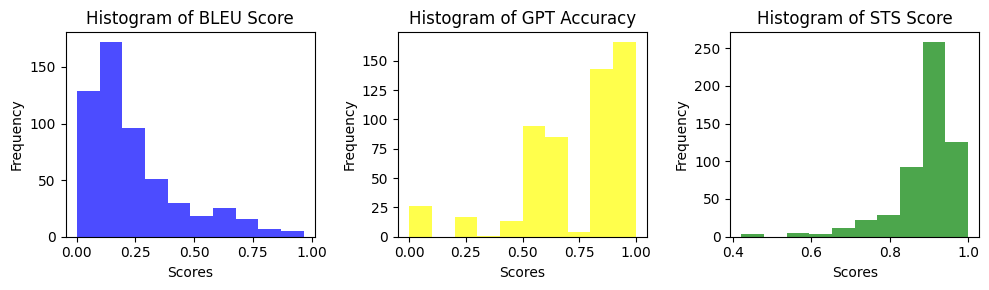

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个包含3个子图的图形，1行3列的布局
fig, axs = plt.subplots(1, 3, figsize=(10, 3))  # figsize可以根据需要调整

# 为每列绘制直方图
columns = ['bleu_score', 'gpt_accuracy', 'sts_score']
column_labels = ['BLEU Score', 'GPT Accuracy', 'STS Score']
colors = ['blue', 'yellow', 'green']

for i, (ax, column, color, label) in enumerate(zip(axs, columns, colors, column_labels)):
    ax.hist(df_qa[column], bins=10, color=color, alpha=0.7)  # 可以为每个直方图设置不同的颜色
    ax.set_title(f'Histogram of {label}')
    ax.set_xlabel('Scores')
    ax.set_ylabel('Frequency')

# 调整子图间距
plt.tight_layout()

# 显示图表
plt.show()

In [71]:
df_qa

,content,summary,qa_llm_answer,bleu_score,match_result,gpt_accuracy,sts_score
0,空间站多功能光学设施的科学白皮书是在哪一年撰写的？,空间站多功能光学设施的科学白皮书是在2020年7月撰写的。,**空间站多功能光学设施的科学白皮书是在2020年7月撰写的**^[1]^。\n\n空间站多...,0.194259,accuracy: 1,1.0,0.903256
1,空间站多功能光学设施的研制单位是谁？,从文档中找不到答案。,**空间站多功能光学设施的研制单位是中国科学院相关单位**^[1]^。\n\n具体分工为：\...,0.001856,accuracy: 0,0.0,0.717170
2,空间站光学舱主要负责什么功能？,空间站光学舱是一台2米口径的空间天文望远镜，主要工作在近紫外-可见光-近红外波段，兼具大视场...,空间站光学舱主要负责**大视场、高质量、高分辨率成像**的功能^[1]^。\n\n空间站光学...,0.385090,accuracy: 0.8\n\n模型回答捕捉到了空间站光学舱的主要功能和工作波段，同时提及...,0.8,0.926008
3,多色成像与无缝光谱巡天模块有什么特点？,从文档中无法直接获取多色成像与无缝光谱巡天模块的具体特点，但提到了它是空间站多功能光学设施的...,多色成像与无缝光谱巡天模块的特点主要体现在以下几个方面：\n\n1. **大型焦面相机**：...,0.065328,accuracy: 0.4\n\n解释：模型回答虽然提到了多色成像与无缝光谱巡天模块是空间站...,0.4,0.894848
4,多通道成像仪的主要功能是什么？,从文档中无法直接获取多通道成像仪的主要功能描述，但它是空间站多功能光学设施的一个组成部分。,多通道成像仪的主要功能包括以下几个方面：\n\n1. **0级数据可用性标记检查**：检查0...,0.026321,accuracy: 0\n\n解释：模型回答并没有直接给出多通道成像仪的主要功能，而是表示从...,0.0,0.873253
...,...,...,...,...,...,...,...
544,我国天文界正在规划对M31进行哪些观测？,我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...,我国天文界正在规划对M31进行前所未有的高灵敏度、完整天区、多波段的深度巡天观测，主要包含以...,0.966058,accuracy: 1,1.0,1.000000
545,CSST的中性碳巡天在M31自主巡天项目中占据怎样的地位？,CSST的中性碳巡天将与FAST、JCMT的巡天一起成为M31自主巡天项目的重要战略组成部分...,**CSST的中性碳巡天在M31自主巡天项目中占据重要的战略组成部分**^[1]^。\n\n...,0.181704,accuracy: 0.8\n\n模型回答正确地指出了CSST的中性碳巡天在M31自主巡天项...,0.8,0.720169
546,为什么说CSST对M31的CI观测是独有的机会？,CSST对M31的CI观测是独有的机会，因为M31是距离银河系最近的漩涡星系，且结构相似、近...,CSST对M31的CI观测是独有的机会，因为**CSST太赫兹模块的CI观测数据将提供完整的...,0.221009,accuracy: 0.7\n\n解释：模型回答正确指出了CSST对M31的CI观测是独有的...,0.7,0.980033
547,CI观测数据将如何用于对M31的多波段研究？,CI观测数据将提供完整的漩涡星系中性碳数据库，与JCMT尘埃巡天、Herschel红外尘埃巡...,CI观测数据将用于对M31的多波段研究，具体方法如下：\n\n* **CI观测数据将提供完整...,0.344485,accuracy: 0.8\n\n模型回答涵盖了CI观测数据用于对M31的多波段研究的主要方...,0.8,0.835174
